In [ ]:
"""
Financial analysis of NYSE listed companies with pandas.
Visualisations with plot.ly and seaborn.
Data from Yahoo Finance.

"""

In [4]:
#!pip install pandas_datareader

In [33]:
from pandas_datareader import data, wb
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

In [34]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [35]:
# Bank of America
BAC = web.DataReader('BAC', 'yahoo', start=start, end=end)
# CitiGroup
C = web.DataReader('C', 'yahoo', start=start, end=end)
# Goldman Sachs
GS = web.DataReader('GS', 'yahoo', start=start, end=end)
# JPMorgan Chase
JPM = web.DataReader('JPM', 'yahoo', start=start, end=end)
# Morgan Stanley
MS = web.DataReader('MS', 'yahoo', start=start, end=end)
# Wells Fargo
WFC = web.DataReader('WFC', 'yahoo', start=start, end=end)

In [36]:
tickers = ["BAC","C","GS","JPM","MS","WFC"]

In [37]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis=1,keys=tickers) #concatinating all stock dataframes into one

In [38]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  33.584068   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.227394   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.270184   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.220257   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.241669   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  35.558964  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  35.583355  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  35.680927  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  35.717525  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  36.095596  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.242817  
2006-01-04  31.530001  10870000.0  20.008024  
2006-01-05  31.495001  10158000.0  19.985823  
2006-01-06  31.680000   8403800.0  20.103220  
2006-01-09  31.674999   5619600.0  20.100044  

[5 rows x 36 columns]

In [39]:
bank_stocks.xs(key="Close", axis=1, level=1).max() # max close price for each bank throughout the time period

BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [40]:
returns = pd.DataFrame()

In [41]:
for tick in tickers:
    returns[tick+" Return"] = bank_stocks[tick]["Close"].pct_change() # using pandas pct_change() method to calculate return

In [42]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [45]:
returns.idxmin() # checking worst day returns using pandas idxmin() method

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [46]:
returns.idxmax() # checking best day returns using pandas idxmax() method

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [50]:
returns.std() #checking standard deviation

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [53]:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [61]:
bank_stocks.xs(key="Close", axis=1,level=1).iplot()

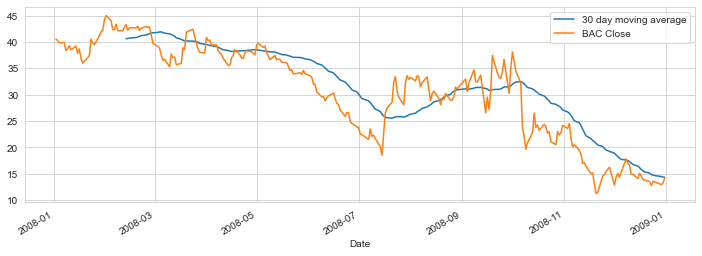

In [72]:
# plotting 30 day average against the Close price for Bank of America in 2008

plt.figure(figsize=(12,4))
BAC["Close"].loc["2008-01-01":"2009-01-01"].rolling(window=30).mean().plot(label = "30 day moving average")
BAC["Close"].loc["2008-01-01":"2009-01-01"].plot(label="BAC Close")
plt.legend()

In [75]:
# creating candle stick chart for BAC from 2015 using plot.ly method iplot()

bac15 = BAC[["Open","High","Low","Close"]].loc["2015-01-01":"2016-01-01"]
bac15.iplot(kind="candle")

In [76]:
# simple moving averages of Morgan Stanley for 2015

MS["Close"].loc["2015-01-01":"2016-01-01"].ta_plot(study="sma",periods=[13,21,55])